<a href="https://colab.research.google.com/github/divyamgautam/keyntrospect/blob/main/EmotionSensingAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries:

# **Data Preprocessing:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
!pip install neattext
import neattext.functions as ntf  

Importing Dataset:

In [ ]:
df = pd.read_csv('emotion_dataset_2.csv')

In [ ]:
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

Emotion Analysis:

In [ ]:
from textblob import TextBlob
def get_sentiment(text):
  blob = TextBlob(text)
  sentiment = blob.sentiment.polarity
  if sentiment>0:
    result = "positive" 
  elif sentiment<0:
    result = "negative" 
  else:
    result = "neutral"   
  return result  

In [ ]:
get_sentiment("I would love to play football")

'positive'

In [ ]:
df['Sentiment'] = df['Text'].apply(get_sentiment)
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text,Sentiment
0,0,neutral,Why ?,NaN,neutral
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow,neutral
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...,negative
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...,positive
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...,neutral


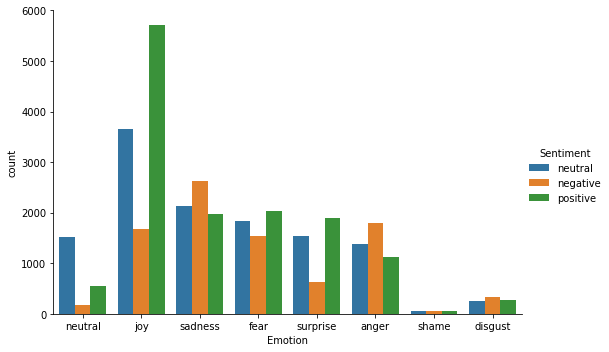

In [ ]:
sb.catplot(x='Emotion', hue='Sentiment', data=df, aspect = 1.5, kind = 'count')

Cleaning the Dataset of redundancies:

In [ ]:
df['Clean_Text'] = df['Text'].apply(ntf.remove_stopwords)

In [ ]:
df['Clean_Text'] = df['Clean_Text'].apply(ntf.remove_userhandles)

In [ ]:
df['Clean_Text'] = df['Clean_Text'].apply(ntf.remove_punctuations)

In [ ]:
df[['Text','Clean_Text']]

,Text,Clean_Text
0,Why ?,
1,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...
34787,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,A man robbed me today .,man robbed today
34790,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


Extracting Keywords:

In [ ]:
from collections import Counter

In [ ]:
def extract_keywords(text,num=50):
  tokens = [tok for tok in text.split()]
  most_common_tokens = Counter(tokens).most_common(num)
  return dict(most_common_tokens)



In [ ]:
emotion_list = df['Emotion'].unique().tolist()
emotion_list

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [ ]:
joy_list = df[df['Emotion']=='joy']['Clean_Text'].tolist()
joy_doc = ''.join(joy_list)
keywords_joy = extract_keywords(joy_doc)

ML Packages and Vectorisers:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split  


Building Features from Text:

In [ ]:
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

Vectorising:

In [ ]:
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)
cv.get_feature_names

<bound method CountVectorizer.get_feature_names of CountVectorizer()>

# **Test-Train Split:**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size = 0.3, random_state = 42)

# **Building the Model:**

Testing Accuracy:

In [ ]:
sample_text = ["I will you when I see you"]
vect = cv.transform(sample_text).toarray()

# **Defining the function for emotion-prediction:**

In [ ]:
def predict_emotion(sample_text, model):
  myvect = cv.transform(sample_text).toarray()
  prediction = model.predict(myvect)
  predprob = model.predict_proba(myvect)
  predprobforall = dict(zip(model.classes_,predprob[0]))
  print("Prediction: {}, Prediction Score: {}".format(prediction[0], np.max(predprob)))
  return predprobforall
  

Model Evaluation: 

# **Saving the Model:**

In [ ]:
import joblib

# **Model Interpretation:**

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
lr_model.score(X_test,y_test)

0.622341444721211

In [ ]:
predict_emotion(sample_text, lr_model)

Prediction: surprise, Prediction Score: 0.3446818525819273


{'anger': 0.10626370777109521,
 'disgust': 0.023772634985762636,
 'fear': 0.17043469981029344,
 'joy': 0.16759299994246374,
 'neutral': 0.011261727415109602,
 'sadness': 0.17427857532543692,
 'shame': 0.0017138021679111825,
 'surprise': 0.3446818525819273}

# **Saving Logistic Regression Model**

In [ ]:
import pickle
pickle.dump(lr_model, open('lr_emotion_sensing_AI.pkl','wb'))